## **Abhishek** **Shekhar**                                                          
# **DSDA** **385**                                                                 
# **Final** **Exam**


Data Set Information:

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).

In [87]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#using the pandas dataframe to load the dataset into df
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [89]:
#printing the top 10 records
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


For consistency with the feature description let's 

1.   List item
2.   List item

represent the platelets as kiloplatelets/mL 

In [91]:
df.platelets = df.platelets/1000
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263.35803,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1


In [92]:
df["CPK"] = df["creatinine_phosphokinase"] #For proper abbreviation
df = df.drop("creatinine_phosphokinase", axis=1)

In [93]:
#Feature distribution
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

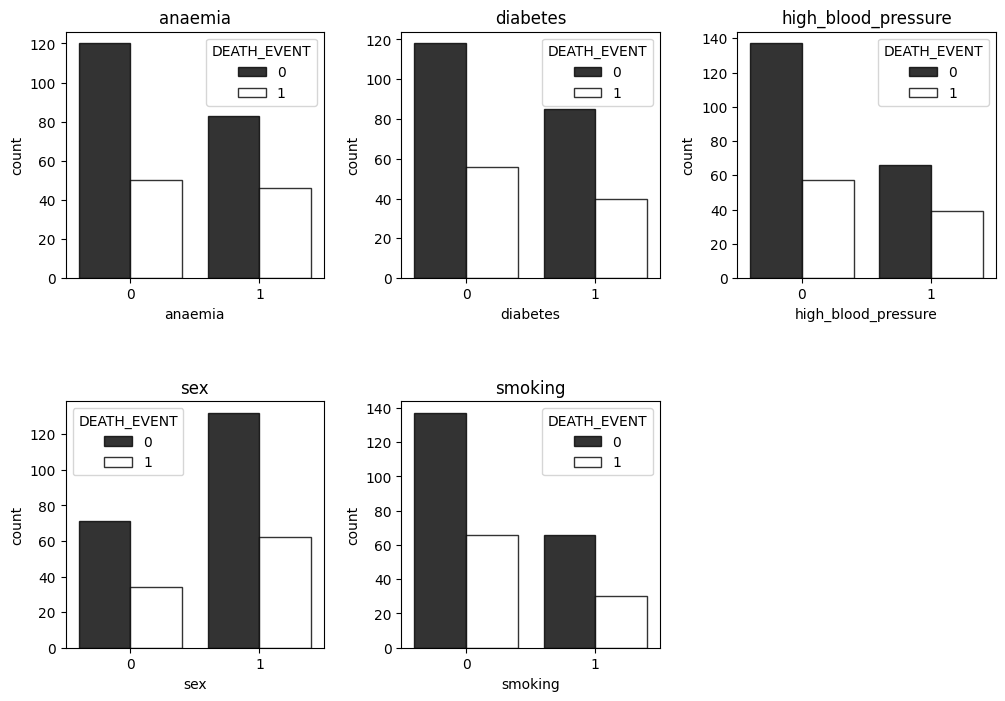

In [94]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=df, x=col, hue="DEATH_EVENT", palette = ["black", "white"], alpha=0.8, edgecolor="k", linewidth=1)

In [95]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

<ipython-input-96-f73c366998a0>:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
<ipython-input-96-f73c366998a0>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
<ipython-input-96-f73c366998a0>:16: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
<ipython-input-96-f73c36

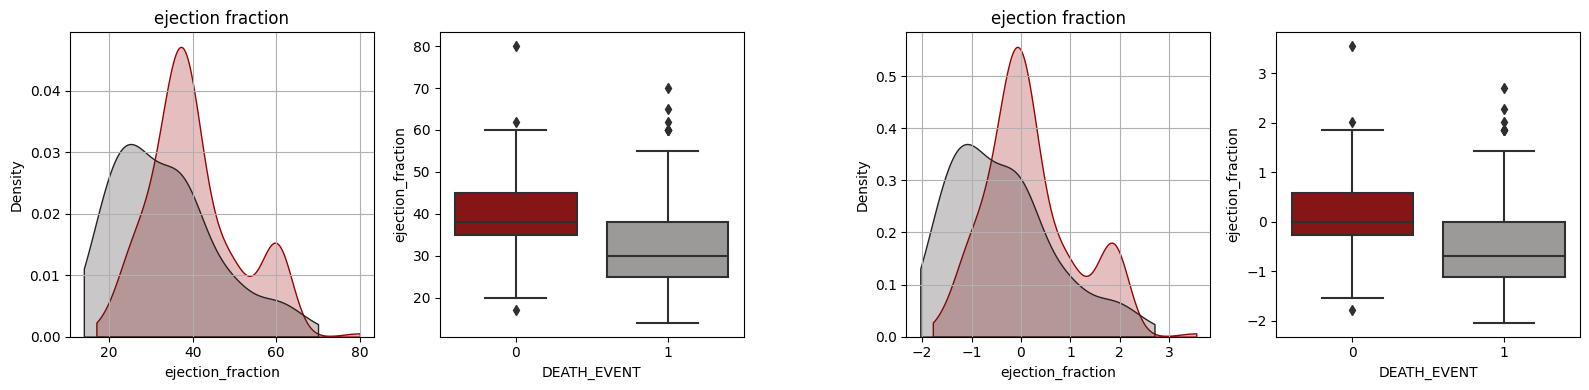

In [96]:
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from matplotlib import gridspec

df_norm = df.copy()

for i, col in enumerate(numerical_features):
    df_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(df_norm[[col]])
    
plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1 ,0.1, 1, 1])
plt.subplot(gs[0])   
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(df.loc[df["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(df.loc[df["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[1]) 
sns.boxplot(y = "ejection_fraction", data = df, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])  
plt.subplot(gs[2])

plt.axis('off')
plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(df_norm.loc[df["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(df_norm.loc[df["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[4])
sns.boxplot(y = "ejection_fraction", data = df_norm, x="DEATH_EVENT", palette = ["#990303", "#9C9999"]);  
plt.tight_layout()

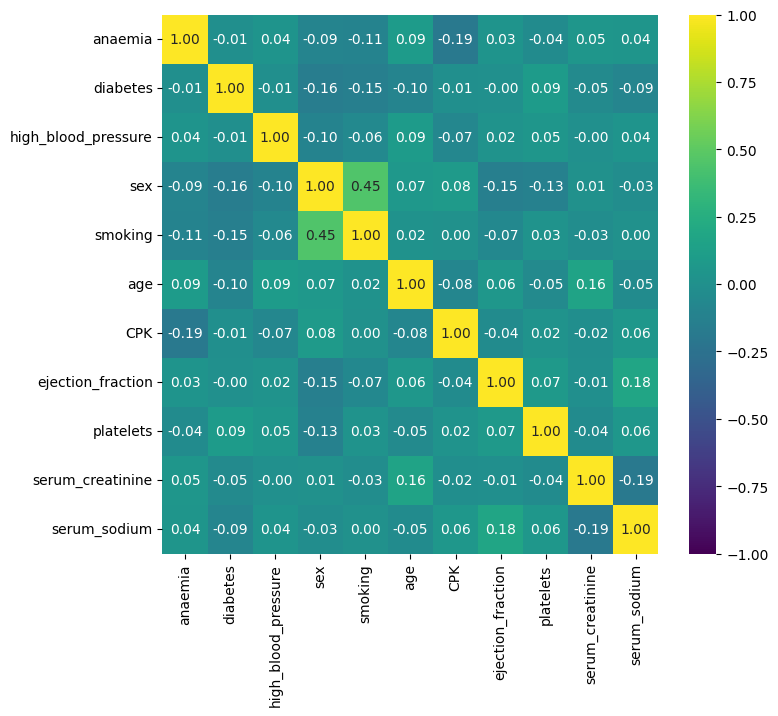

In [97]:
plt.figure(figsize=(8, 7))
sns.heatmap(df_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

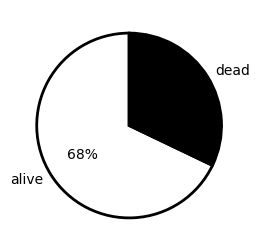

In [98]:
plt.figure(figsize=(3, 3))
plt.pie(df["DEATH_EVENT"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["white", "black"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

In [99]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [100]:
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(df_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(df, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


In [101]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print("Observed")
ctable = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
ctable.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
ctable.index = ["anaemia=0", "anaemia=1"]
ctable.loc["Total"] = ctable.sum()
ctable["Total"] = ctable.sum(axis=1)
ctable
def chi2_test(df, feat1, feat2):

    contingency_table = pd.crosstab(df[feat1], df[feat2])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)
    #print('alpha=%.3f, critical_value=%.3f,\nstat=%.3f' % (1 - prob, critical, stat))

    # interpret p-value
    alpha = 1.0 - prob
    
    return stat, p

Observed


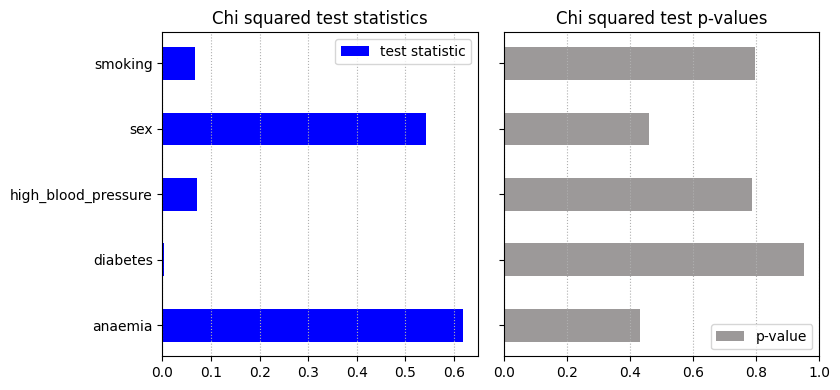

In [102]:
stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(ho_train_df, feat, "DEATH_EVENT")
    stats.append(stat)
    p_values.append(p)        

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="blue", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#9C9999", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

# From the chi-square test we can determine that sex, high blood pressure and diabetes has no implact on the target value, so dropping them

In [104]:
df = df.drop("smoking", axis=1)
df = df.drop("high_blood_pressure", axis=1)
df = df.drop("diabetes", axis=1)

In [105]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,9,8]]

In [106]:
df.shape

(299, 10)

In [107]:
df.columns

Index(['age', 'anaemia', 'ejection_fraction', 'platelets', 'serum_creatinine',
       'serum_sodium', 'sex', 'time', 'CPK', 'DEATH_EVENT'],
      dtype='object')

# Training CNN model with 70 percent of the dataset
Used SMOTE to deal with biased dataset, SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [207]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split into features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Use SMOTE oversampling to balance the dataset
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
from keras.utils import to_categorical

# Convert target variable to one-hot encoded format
y_train_res = to_categorical(y_train_res)

# Reshape the input data for Conv1D layers
X_train_res = X_train_res.values.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


# Build CNN model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='sigmoid', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model.add(Conv1D(filters=128, kernel_size=2, activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=256, kernel_size=2, activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=30)
tensorboard_callback = TensorBoard(log_dir="./logs")

model.fit(X_train_res, y_train_res, batch_size=32, epochs=1000, callbacks=[tensorboard_callback, early_stopping])



Epoch 1/1000
10/10 [==============================] - 4s 16ms/step - loss: 0.7430 - accuracy: 0.4600
Epoch 2/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.7270 - accuracy: 0.4967
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.7151 - accuracy: 0.4867
Epoch 4/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.7168 - accuracy: 0.5133
Epoch 5/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.7074 - accuracy: 0.5033
Epoch 6/1000
10/10 [==============================] - 0s 22ms/step - loss: 0.7175 - accuracy: 0.4767
Epoch 7/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 8/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.7090 - accuracy: 0.4933
Epoch 9/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.7076 - accuracy: 0.4967
Epoch 10/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.7200 - accura

# Confusion Matrix and Accuracy of the CNN Model.

# The training accuracy of 88.76% and testing accuracy of 73.3% for the CNN model of the heart failure prediction dataset indicate that the model is performing reasonably well on both the training and testing data. However, the testing accuracy is lower than the training accuracy, which indicates that the model may be overfitting to the training data.

3/3 [==============================] - 0s 7ms/step


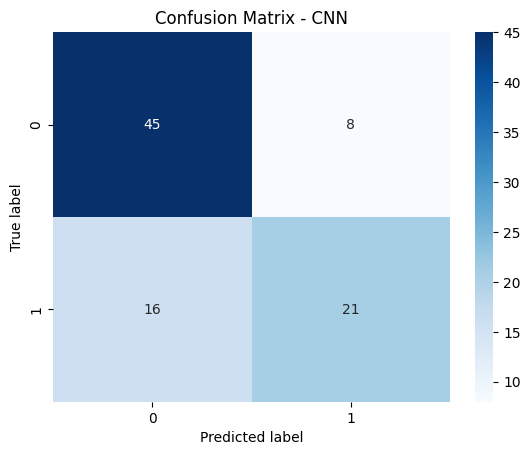

Accuracy: 73.33%


In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels for the testing data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - CNN")
plt.show()
# Evaluate the model on the test set
accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print("Accuracy: {:.2f}%".format(accuracy*100))

# Training RNN Model, using the same dataset and using the same training and testing data

In [210]:

from tensorflow.keras.layers import LSTM, Dropout, Dense

# Build RNN model
model1 = Sequential()

model1.add(LSTM(units=64, activation='tanh', input_shape=(X_train_res_rnn.shape[1], X_train_res_rnn.shape[2])))
model1.add(Dropout(0.25))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dropout(0.25))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=30)
tensorboard_callback = TensorBoard(log_dir="./logs")

model1.fit(X_train_res, y_train_res, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback, early_stopping])


Epoch 1/1000
8/8 [==============================] - 4s 89ms/step - loss: 0.7185 - accuracy: 0.5333 - val_loss: 0.9634 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.5958 - val_loss: 0.9929 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.6675 - accuracy: 0.6250 - val_loss: 1.0374 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.6629 - accuracy: 0.6250 - val_loss: 0.9927 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.6635 - accuracy: 0.6417 - val_loss: 0.9314 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.6407 - accuracy: 0.6333 - val_loss: 0.9422 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.6403 - accuracy: 0.6583 - val_loss: 0.9727 - val_accura

# COnfusion Matrix and Accuracy of RNN model.

# The model is learning to perfectly fit the training data, but it is not able to generalize well to unseen data, resulting in a lower accuracy on the testing data.
# Training Accuracy = 90% and Testing Accuracy = 72.2%

3/3 [==============================] - 0s 5ms/step


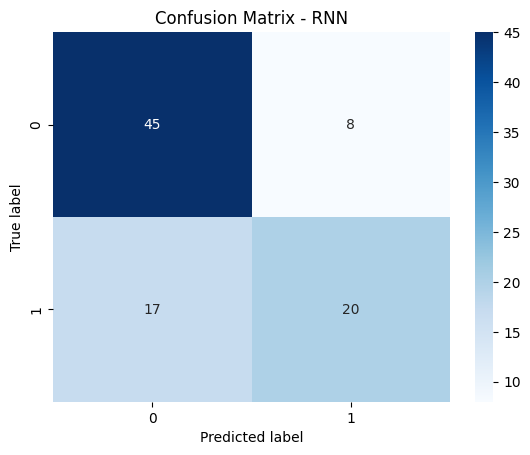

Accuracy: 72.22%


In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels for the testing data
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - RNN")
plt.show()
# Evaluate the model on the test set
accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print("Accuracy: {:.2f}%".format(accuracy*100))

# Performing K means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI) for K-means clustering: 0.008


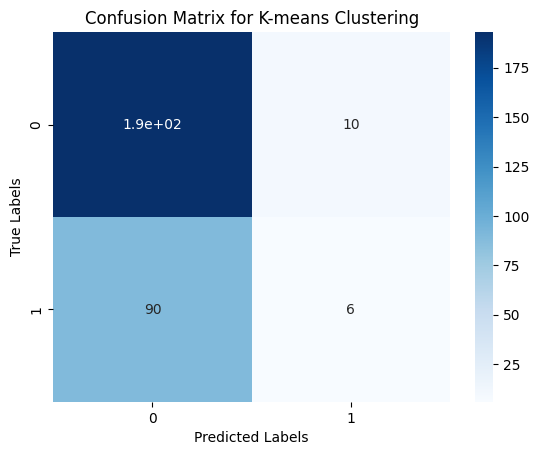

In [217]:
# Importing necessary libraries for performing K-means and SOM clustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

# Performing K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(df.iloc[:, :-1])
df['kmeans_cluster'] = kmeans.labels_

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['DEATH_EVENT'], df['kmeans_cluster'])
print("Adjusted Rand Index (ARI) for K-means clustering: {:.3f}".format(ari))


# Confusion matrix for K-means clustering
cm_kmeans = confusion_matrix(df['DEATH_EVENT'], df['kmeans_cluster'])
sns.heatmap(cm_kmeans, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-means Clustering')
plt.show()



In [218]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

wcss = kmeans.inertia_
print("Within-cluster sum of squares (WCSS) for K-means clustering: {:.3f}".format(wcss))


Within-cluster sum of squares (WCSS) for K-means clustering: 64670739.460


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# `Silhouette coefficient for K-means clustering: 0.801

# A Silhouette coefficient of 0.801 indicates that the clustering is good, with well-defined clusters and high intra-cluster similarity and inter-cluster dissimilarity. It suggests that the K-means algorithm has effectively separated the data into distinct clusters. 

In [219]:
from sklearn.metrics import silhouette_score

silhouette_coeff = silhouette_score(X_train, kmeans.labels_)
print("Silhouette coefficient for K-means clustering: {:.3f}".format(silhouette_coeff))


Silhouette coefficient for K-means clustering: 0.801


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


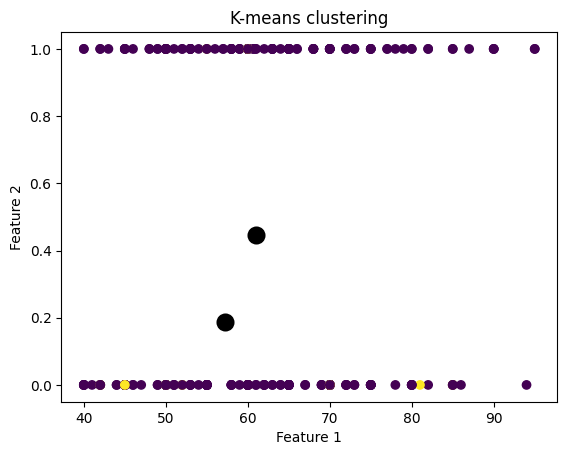

Silhouette score: 0.83
Inertia: 105271567.87


In [220]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Drop the target column from the DataFrame
X = df.drop('DEATH_EVENT', axis=1)

# Fit K-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, linewidths=3, color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

# Compute the silhouette score and inertia of the clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
inertia = kmeans.inertia_

# Print the metrics
print(f'Silhouette score: {silhouette_avg:.2f}')
print(f'Inertia: {inertia:.2f}')


# Implementing SOM(Self Organized Map)

In [36]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn import preprocessing as sk_preprocessing
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation

In [37]:
# Data Normalization
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [38]:
#main function

train_x_norm = minmax_scaler(X) # normalisation
data = minmax_scaler(X) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)

accuracies = []

In [43]:
# hyperparameters  
grid = [[25, 25]]
max_m_dsitance = 4
max_learning_rate = 0.4
max_steps = int(150001)
loop = [150000]

In [44]:
for j in range(len(grid)):
  num_rows = grid[j][0]
  num_cols = grid[j][1]
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction
  print(f"Grid size: {num_rows} x {num_cols}")
    
  for step in range(max_steps):
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)
    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    
    for row in range(num_rows):
      for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
          som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
        
    for i in loop:
      if step == i:
        label_data = np.array(y)
        map = np.empty(shape=(num_rows, num_cols), dtype=object)

        for row in range(num_rows):
          for col in range(num_cols):
            map[row][col] = [] # empty list to store the label

        for t in range(train_x_norm.shape[0]):
          winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
          map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
        label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
        for row in range(num_rows):
          for col in range(num_cols):
            label_list = map[row][col]
            if len(label_list)==0:
              label = 2
            else:
              label = max(label_list, key=label_list.count)
            label_map[row][col] = label
        
        winner_labels = []

        for t in range(data.shape[0]):
          winner = winning_neuron(data, t, som, num_rows, num_cols)
          row = winner[0]
          col = winner[1]
          predicted = label_map[row][col]
          winner_labels.append(predicted)
        
        accuracy = accuracy_score(y, np.array(winner_labels))
        print(f"- Accuracy at iteration {i}:", accuracy)
        accuracies.append(accuracy)
    
  print()

Grid size: 25 x 25
- Accuracy at iteration 150000: 0.9632107023411371



In [46]:
#print(accuracies)
best_accuracy_som = max(accuracies)
print(f'The best accuracy for SOM is {round(best_accuracy_som*100, 2)}%')
index = accuracies.index(best_accuracy_som)
grid_size = "25X25"
best_iteration = loop[index%10]
print(f'The best grid size is {grid_size} at iteration {best_iteration}')

The best accuracy for SOM is 96.32%
The best grid size is 25X25 at iteration 150000


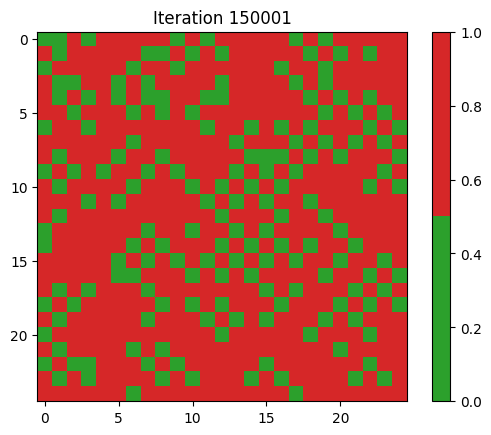

[1]


In [48]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 1
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()
print(label_list)

# Confusion matrix and Accuracy of SOM

# Accuracy = 96.32%
# An SOM accuracy of 96.2% indicates that the majority of the input data instances are correctly mapped to their corresponding nodes in the output space. This suggests that the SOM has successfully captured the underlying patterns in the input data and organized it into a meaningful, lower-dimensional representation

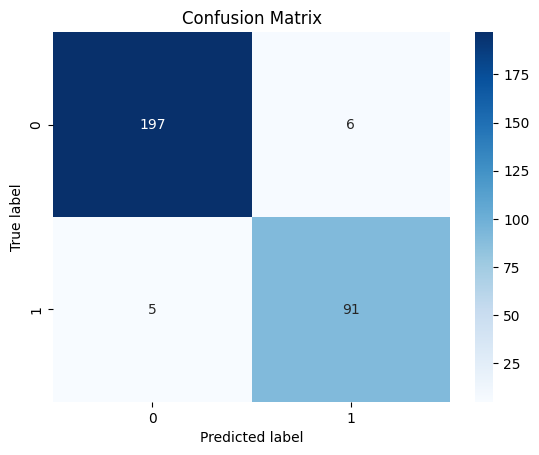

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, np.array(winner_labels))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [223]:
accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.32%


# Reporting the results summary

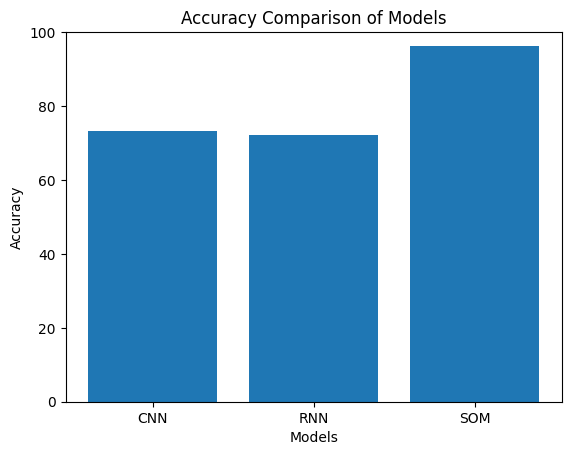

In [224]:
import matplotlib.pyplot as plt

models = ['CNN', 'RNN', 'SOM']
accuracies = [73.3, 72.2, 96.2]

plt.bar(models, accuracies)
plt.ylim(0, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.show()

# The SOM model's high accuracy could be due to the nature of the algorithm, which is based on unsupervised learning and can be highly effective for identifying patterns and anomalies in complex data. The CNN and RNN models, on the other hand, are based on supervised learning and require labeled data to train on, which can be more difficult in certain cases.

